In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from PIL import Image,ImageOps
import os
import numpy as np
import matplotlib.pyplot as plt

A very simple machine learning model is used: K Nearest Neighbor classifier 

# Get the Data

Little data is needed to get a good accuracy.
If you want to add a pieceset:

Get some screenshots with each a random board and save every tile as an image. Name the file to its piece name and add it to the data directory. Look into the directory to see how each file is named and organised. Make sure each image is in grayscale with a size of 40*40.

In [2]:
def getListOfFiles(dirName):
    ''' Return a list of every file in a root directory path and the piece '''

    # create a list of file and sub directories 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory + their names
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append([fullPath,fullPath[-5]])
                
    return allFiles

In [3]:
all_files = getListOfFiles('data')

In [4]:
def image_transformer(path):
    img = Image.open(path)
    numpy_array = np.asarray(img)
    return numpy_array.tolist()

X_data = np.array([image_transformer(entry[0]) for entry in all_files])
y_data = np.array([entry[1] for entry in all_files])
X_transformed_data = X_data.reshape(np.shape(X_data)[0],np.shape(X_data)[1]**2)

X_train,X_test,y_train,y_test = train_test_split(X_transformed_data,y_data,test_size=0.2)

# Explore the Data

In [5]:
print(f"Number of training rows: {len(X_train)}")

Number of training rows: 7321


In [6]:
print(f"Image shape:{np.shape(X_data[0])}")

Image shape:(40, 40)


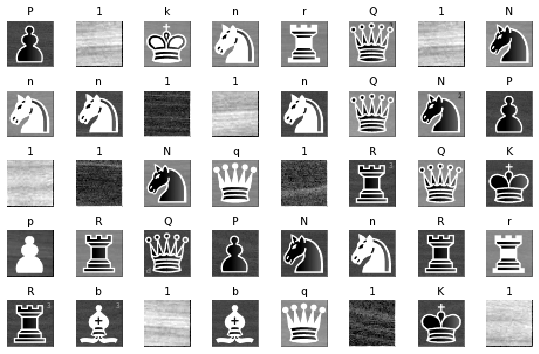

In [7]:
n_rows = 5
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_data[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_data[index], fontsize=11)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Train the data using KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Run it for k = 1 to 10 and record testing accuracy ==> plotting it
range_k = range(1,10)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(leaf_size=15,n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy')

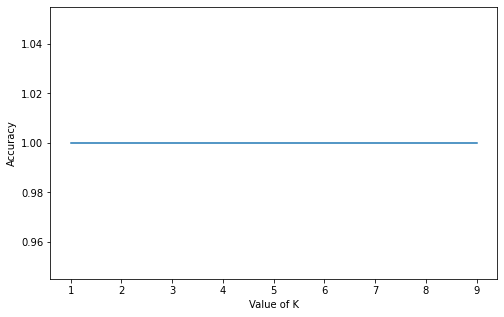

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

We achieve a accuracy of 1, even with only 1 neighbor!!!

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       455
           B       1.00      1.00      1.00       141
           K       1.00      1.00      1.00        30
           N       1.00      1.00      1.00       140
           P       1.00      1.00      1.00       115
           Q       1.00      1.00      1.00       153
           R       1.00      1.00      1.00       121
           b       1.00      1.00      1.00       159
           k       1.00      1.00      1.00        30
           n       1.00      1.00      1.00       132
           p       1.00      1.00      1.00       110
           q       1.00      1.00      1.00       127
           r       1.00      1.00      1.00       118

    accuracy                           1.00      1831
   macro avg       1.00      1.00      1.00      1831
weighted avg       1.00      1.00      1.00      1831

Confusion Matrix:
[[455   0   0   0   0   0   0   0   0 

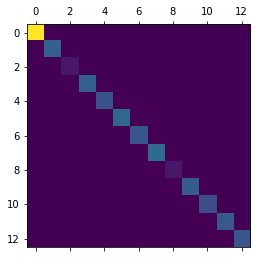

In [10]:
#Plot confusing matrix and print classification report
clf_rep = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print(clf_rep)

conf_mx = metrics.confusion_matrix(y_test, y_pred)
plt.matshow(conf_mx,)
print("Confusion Matrix:")
print(conf_mx)

# Train and save the final model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_clf = KNeighborsClassifier(leaf_size=15,n_neighbors=2,n_jobs=-1)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=15, n_jobs=-1, n_neighbors=2)

In [12]:
y_pred = knn_clf.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred)}")

Accuracy: 1.0


In [13]:
import joblib
joblib.dump(knn_clf,"model.pkl")

['model.pkl']